# Colors

In [2]:
(require
 '[opencv4.utils :as u]
 '[opencv4.colors.html :as html]
 '[opencv4.colors.rgb :as rgb]
 '[opencv4.core :refer :all])

In [3]:
(-> (new-mat 20 20 CV_8UC3 rgb/red-3)
	(u/>>> ))

In [5]:
(dump (new-mat 2 2 CV_8UC3 rgb/red-3))

[0 0 205 0 0 205]
[0 0 205 0 0 205]


In [6]:
rgb/red-3

#object[org.opencv.core.Scalar 0x5b10be23 "[0.0, 0.0, 205.0, 0.0]"]

In [7]:

(->> (html/->scalar "#66cc77")
     (new-mat 20 20 CV_8UC3 )
	 (u/>>> ))

In [8]:
(html/->scalar "#66cc77")

#object[org.opencv.core.Scalar 0x262cce1d "[119.0, 204.0, 102.0, 0.0]"]

In [9]:
(->> (new-scalar 119 204 102)
     (new-mat 20 20 CV_8UC3 )
	 (u/>>> ))

In [10]:
rgb/yellow-3

#object[org.opencv.core.Scalar 0x39012b6 "[0.0, 205.0, 205.0, 0.0]"]

In [12]:
(-> (new-mat 3 3 CV_8UC3 rgb/red-1)
    (apply-color-map! COLORMAP_JET)
    (u/>>>))

In [13]:
(def colors-maps
[COLORMAP_HOT
 COLORMAP_HSV
 COLORMAP_JET
 COLORMAP_BONE
 COLORMAP_COOL
 COLORMAP_PINK
 COLORMAP_RAINBOW
 COLORMAP_OCEAN
 COLORMAP_WINTER
 COLORMAP_SUMMER
 COLORMAP_AUTUMN
 COLORMAP_SPRING])

#'user/colors-maps

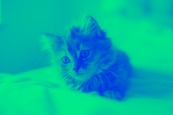

In [14]:

(-> "resources/chapter02/cat-on-sofa.jpg" 
    (imread IMREAD_REDUCED_COLOR_4)
    (apply-color-map! COLORMAP_WINTER) 
    (u/>>>))

In [16]:
(-> (new-mat 3 3 CV_8UC3 rgb/yellow-2)
    (dump))

[0 238 238 0 238 238 0 238 238]
[0 238 238 0 238 238 0 238 238]
[0 238 238 0 238 238 0 238 238]


In [17]:
(-> (new-mat 30 30 CV_8UC3 rgb/yellow-2) u/>>>)

In [18]:
(-> (new-mat 3 3 CV_8UC3 rgb/yellow-2)
    (transform! custom)
    (dump))

[0 119 255 0 119 255 0 119 255]
[0 119 255 0 119 255 0 119 255]
[0 119 255 0 119 255 0 119 255]


In [19]:

(-> (new-mat 30 30 CV_8UC3 rgb/yellow-2)
    (transform! custom)
    u/>>>)

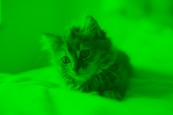

In [23]:

(def custom 
  (u/matrix-to-mat [
  [0 0 0] ; blue
  [0.5 0.5 0] ; green 
  [0 0 0] ; red
  ]))

(-> "resources/chapter02/cat-on-sofa.jpg" 
   (imread IMREAD_REDUCED_COLOR_4)
   (transform! custom)
   (u/>>> ))

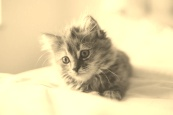

In [24]:

(def sepia-2 (u/matrix-to-mat [
  [0.131 0.534 0.272]
  [0.168 0.686 0.349]
  [0.189 0.769 0.393]
  ]))

(-> "resources/chapter02/cat-on-sofa.jpg" 
   (imread IMREAD_REDUCED_COLOR_4)
   (transform! sepia-2)
   (u/>>> ))

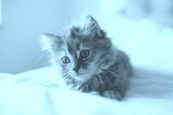

In [25]:
(def blue-sepia (u/matrix-to-mat [
  [0.393 0.769 0.189] ; blue
  [0.349 0.686 0.168] ; green
  [0.272 0.534 0.131] ; red
  ]))

(-> "resources/chapter02/cat-on-sofa.jpg" 
   (imread IMREAD_REDUCED_COLOR_4)
   (transform!  blue-sepia)
   (u/>>> ))

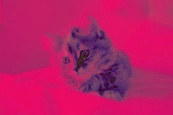

In [26]:
(-> "resources/chapter02/cat-on-sofa.jpg" 
   (imread IMREAD_REDUCED_COLOR_4)
   (cvt-color! COLOR_RGB2HSV)
   ;(cvt-color! COLOR_HSV2RGB)
   (u/>>>))

In [29]:
(-> (new-mat 1 1 CV_8UC3 rgb/red-2)
    (dump))

(-> (new-mat 30 30 CV_8UC3 rgb/red-2)
	(u/>>>))

(-> (new-mat 1 1 CV_8UC3 rgb/red-2)
    (cvt-color! COLOR_RGB2HSV)
    (dump))

(-> (new-mat 30 30 CV_8UC3 rgb/red-2)
    (cvt-color! COLOR_RGB2HSV)
    (u/>>>))

[0 0 238]
[120 255 238]


In [30]:

(->> (range 255)
     (map #(new-mat 20 1 CV_8UC3 (new-scalar % % 255)))
     (hconcat!)
	 (u/>>>))

In [31]:
(defn text-mat [h] 
  (let[m (new-mat 20 52 CV_8UC3 rgb/white)]
    (put-text! m (str (* 18 h)) (new-point 0 15) FONT_ITALIC 0.5 rgb/black 1)
    m))

(->> (range 11)
     (map text-mat)
     (hconcat!)
	 (u/>>>))

In [32]:

(defn hsv-mat [h] 
  (let[m (new-mat 17 3 CV_8UC3)]
    (cvt-color! m COLOR_RGB2HSV)
    (set-to m (new-scalar h 255 255))
    (cvt-color! m COLOR_HSV2RGB)
    m))

(->> (range 180)
     (map hsv-mat)
     (hconcat!)
	 (u/>>>))

In [34]:
(defn hsv-mat [h s v] 
  (let[m (new-mat 17 3 CV_8UC3)]
    (cvt-color! m COLOR_BGR2HSV)
    (set-to m (new-scalar h s v))
    (cvt-color! m COLOR_HSV2BGR)
    m))

#'user/hsv-mat

In [35]:
(->> (range 180)
     (map #(hsv-mat % 255 255))
     (hconcat!)
	 (u/>>>))

In [36]:

(->> (range 180)
     (map #(hsv-mat % 100 255))
     (hconcat!)
	 (u/>>>))

In [37]:
(->> (range 180)
     (map #(hsv-mat % 255 100))
     (hconcat!)
	 (u/>>>))

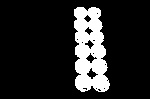

In [38]:
(def lower-yellow  (new-scalar 10 100 100))
(def upper-yellow  (new-scalar 30 255 255))

(def mask (new-mat))

(-> "resources/chapter02/coinscoins.jpg"
    (imread IMREAD_REDUCED_COLOR_2)
    (cvt-color! COLOR_BGR2HSV)
    (in-range lower-red upper-red mask))

(u/>>> mask)

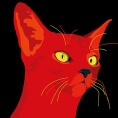

In [40]:

(def lower-red  (new-scalar 105 30 30))
(def upper-red  (new-scalar 150 255 255))

(def mask (new-mat))

(-> "resources/chapter02/redcat.jpg" 
    (imread IMREAD_REDUCED_COLOR_2)
    (u/>>>))


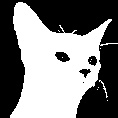

In [41]:
(-> "resources/chapter02/redcat.jpg" 
    (imread IMREAD_REDUCED_COLOR_2)
    (cvt-color! COLOR_RGB2HSV)
    (in-range lower-red upper-red mask))

(u/>>> mask)